In [185]:
import pandas as pd
import numpy as np

In [186]:
loans = pd.read_csv('../data/lending-club-data.csv')

In [187]:
features = list(loans) 

In [188]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x :1 if x == 0 else -1)


In [189]:
loans = loans.drop('bad_loans',axis=1)

In [190]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [191]:
loans = loans[[target] + features].dropna()

In [192]:
training_id = pd.read_json('../data/module-8-assignment-1-train-idx.json')
validation_id = pd.read_json('../data/module-8-assignment-1-validation-idx.json')

In [193]:
train_data = loans.iloc[training_id[0]]
validation_data = loans.iloc[validation_id[0]]

In [194]:
strings = []
for feature in features:
    if loans[feature].dtypes == 'object':
        strings.append(feature)
print strings

['grade', 'home_ownership', 'purpose']


In [195]:
for string in strings:
    print string,loans[string].unique()
    for value in loans[string].unique():
        loans[value] = loans[string].apply(lambda z : 1 if z == value else 0)

grade ['B' 'C' 'A' 'E' 'F' 'D' 'G']
home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
purpose ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house']


In [196]:
loans = loans.drop(strings,axis=1)
features = list(loans)
features.pop(0)
print features

['sub_grade_num', 'short_emp', 'emp_length_num', 'dti', 'payment_inc_ratio', 'delinq_2yrs', 'delinq_2yrs_zero', 'inq_last_6mths', 'last_delinq_none', 'last_major_derog_none', 'open_acc', 'pub_rec', 'pub_rec_zero', 'revol_util', 'total_rec_late_fee', 'int_rate', 'total_rec_int', 'annual_inc', 'funded_amnt', 'funded_amnt_inv', 'installment', 'B', 'C', 'A', 'E', 'F', 'D', 'G', 'RENT', 'OWN', 'MORTGAGE', 'OTHER', 'credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house']


In [197]:
train_data = loans.iloc[training_id[0]]
validation_data = loans.iloc[validation_id[0]]

In [198]:
from sklearn import ensemble

In [199]:
def get_numpy_data(data,features,target):
    feature_matrix = data[features].as_matrix()
    target_matrix = data[target].as_matrix()
    return feature_matrix,target_matrix

In [200]:
model_5 = ensemble.GradientBoostingClassifier(max_depth=6,
                                                     n_estimators=5)

In [201]:
train_feature_matrix,train_target_matrix = get_numpy_data(train_data,features,target)

In [202]:
print "Train feature matrix ",train_feature_matrix.shape
print "Train target matrix ",train_target_matrix.shape

Train feature matrix  (37219, 44)
Train target matrix  (37219,)


In [203]:
model_5.fit(train_feature_matrix,train_target_matrix)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=5, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [204]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]
sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,small_business,other,wedding,debt_consolidation,home_improvement,major_purchase,medical,moving,vacation,house
22,1,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
24,-1,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,0
41,-1,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0


In [205]:
sample_validation_features,sample_validation_target = get_numpy_data(sample_validation_data,
                                                                    features,target)

In [206]:
sample_validation_data['prediction'] = model_5.predict(sample_validation_features)

In [207]:
correct = len(sample_validation_data[sample_validation_data['prediction'] == sample_validation_data[target]])/4.0

In [208]:
print "Correct percentage :",correct*100

Correct percentage : 75.0


# Quiz 1 

## Correct percentage : 75.0

In [209]:
model_5.predict_proba(sample_validation_features)

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

In [210]:
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,other,wedding,debt_consolidation,home_improvement,major_purchase,medical,moving,vacation,house,prediction
22,1,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
26,1,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
24,-1,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,0,-1
41,-1,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,...,0,0,1,0,0,0,0,0,0,1


# Quiz 2

## 4th sample has probablity of 0.604

In [211]:
validation_features_matrix,validation_target_matrix = get_numpy_data(validation_data,features,target)

In [212]:
validation_score = model_5.score(validation_features_matrix,validation_target_matrix)
print "Validation score : ",validation_score

Validation score :  0.661460577337


# Quiz 3

## Validation score : 0.661460577337

In [213]:
validation_data['prediction'] = model_5.predict(validation_features_matrix)

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [214]:
validation_false_positive = len(validation_data[(validation_data['prediction'] == 1) & (validation_data[target] == -1)])
validation_false_negative = len(validation_data[(validation_data['prediction'] == -1) & (validation_data[target] == 1)])

In [215]:
print "False positive in validation data : ",validation_false_positive 
print "False negative in validation data : ",validation_false_negative

False positive in validation data :  1652
False negative in validation data :  1491


# Quiz 4

## False positive : 1652

In [216]:
cost = 10000*validation_false_negative + 20000*validation_false_positive
print "Cost of mistake : ",cost

Cost of mistake :  47950000


# Quiz 5

## Cost of mistake : 47950000

In [168]:
validation_data['probability']  = model_5.predict_proba(validation_features_matrix)[:,1]

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [169]:
validation_data = validation_data.sort(columns=['probability'],ascending=False)

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [172]:
validation_data[['B', 'C', 'A', 'E', 'F', 'D', 'G']].head(5)

,B,C,A,E,F,D,G
8021,0,0,1,0,0,0,0
34261,0,0,1,0,0,0,0
68947,0,0,1,0,0,0,0
99626,0,0,1,0,0,0,0
69995,0,0,1,0,0,0,0


In [171]:
validation_data.tail(5)

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,wedding,debt_consolidation,home_improvement,major_purchase,medical,moving,vacation,house,prediction,probability
101746,-1,0.2,0,11,11.21,4.23624,0.0,1.0,3.0,1,...,0,0,0,1,0,0,0,0,-1,0.315969
114781,-1,0.4,0,3,21.90,7.18760,1.0,0.0,4.0,0,...,0,1,0,0,0,0,0,0,-1,0.315969
27502,-1,1.0,0,3,8.53,14.62800,0.0,1.0,0.0,1,...,0,0,1,0,0,0,0,0,-1,0.312806
84508,-1,0.8,1,1,7.37,16.62070,0.0,1.0,1.0,1,...,0,1,0,0,0,0,0,0,-1,0.307334
58794,-1,0.8,0,2,8.66,17.62510,0.0,1.0,0.0,1,...,0,1,0,0,0,0,0,0,-1,0.307334


# Quiz 6

## Grade A

In [173]:
model_10 = ensemble.GradientBoostingClassifier(n_estimators=10,max_depth=6)
model_50 = ensemble.GradientBoostingClassifier(n_estimators=50,max_depth=6)
model_100 = ensemble.GradientBoostingClassifier(n_estimators=100,max_depth=6)
model_200 = ensemble.GradientBoostingClassifier(n_estimators=200,max_depth=6)
model_500 = ensemble.GradientBoostingClassifier(n_estimators=500,max_depth=6)


In [174]:
model_10.fit(train_feature_matrix,train_target_matrix)
model_50.fit(train_feature_matrix,train_target_matrix)
model_100.fit(train_feature_matrix,train_target_matrix)
model_200.fit(train_feature_matrix,train_target_matrix)
model_500.fit(train_feature_matrix,train_target_matrix)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [176]:
print "Model 10 accuracy validation data ",model_10.score(validation_features_matrix,validation_target_matrix)
print "Model 50 accuracy validation data ",model_50.score(validation_features_matrix,validation_target_matrix)
print "Model 100 accuracy validation data ",model_100.score(validation_features_matrix,validation_target_matrix)
print "Model 200 accuracy validation data ",model_200.score(validation_features_matrix,validation_target_matrix)
print "Model 500 accuracy validation data ",model_500.score(validation_features_matrix,validation_target_matrix)

 Model 10 accuracy validation data  0.666307626023
Model 50 accuracy validation data  0.684510986644
Model 100 accuracy validation data  0.689250323137
Model 200 accuracy validation data  0.689788884102
Model 500 accuracy validation data  0.689034898751


# Quiz 7

## Model 200 produces best result

# Quiz 8

## False, its upto certain stage after that score degrades

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [179]:
models = [model_5,model_10,model_50,model_100,model_200,model_500]

In [181]:
training_errors = [(1-model.score(train_feature_matrix,train_target_matrix)) for model in models]

In [182]:
validation_errors = [(1-model.score(validation_features_matrix,validation_target_matrix)) for model in models]

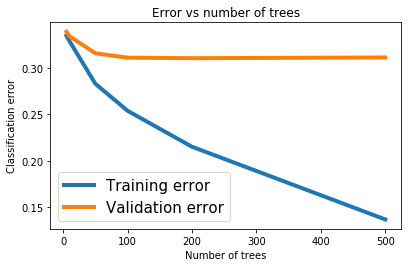

In [183]:
plt.plot([5,10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([5,10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')

# Quiz 9

## Yes training error reduce with the no of trees

# Quiz 10

## False